In [1]:
# 1. 주식데이터
# -관심있는 종목 데이터 다운로드
# -제공되는 데이터(약 3년)
# -4개의 입력 변수 -> 1개의 출력변수(close)
# -데이터를 트레이닝(70)/테스트(30) 데이터로 분리
# -최근 1개월 데이터로 테스트

# 2. tree.csv 파일로 예측
# Girth, Height => Volume 예측

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
data = np.loadtxt("실습데이터/실습데이터/data-02-stock_daily.csv", delimiter=",", dtype=np.float32)
data

array([[8.2865997e+02, 8.3345001e+02, 8.2834998e+02, 1.2477000e+06,
        8.3165997e+02],
       [8.2302002e+02, 8.2807001e+02, 8.2165503e+02, 1.5978000e+06,
        8.2807001e+02],
       [8.1992999e+02, 8.2440002e+02, 8.1897998e+02, 1.2817000e+06,
        8.2415997e+02],
       ...,
       [5.6689258e+02, 5.6700256e+02, 5.5693256e+02, 1.0800000e+04,
        5.5697247e+02],
       [5.6120258e+02, 5.6643262e+02, 5.5867255e+02, 4.1200000e+04,
        5.5999255e+02],
       [5.6800256e+02, 5.6800256e+02, 5.5292255e+02, 1.3100000e+04,
        5.5846252e+02]], dtype=float32)

In [4]:
xdata = data[:,:4] #(732, 4)
ydata = data[:,[-1]] #(732, 1)
print(xdata.shape, ydata.shape)

(732, 4) (732, 1)


In [5]:
#scaler
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaler.fit(xdata)
xdata = scaler.transform(xdata)
xdata

array([[ 1.787148  ,  1.7756876 ,  1.8464404 , -0.6631001 ],
       [ 1.7313234 ,  1.7226986 ,  1.7800059 , -0.31251428],
       [ 1.7007381 ,  1.6865519 ,  1.7534611 , -0.62905294],
       ...,
       [-0.803843  , -0.8486227 , -0.84685767, -1.9017167 ],
       [-0.86016303, -0.85423625, -0.82959163, -1.8712746 ],
       [-0.79285634, -0.8387734 , -0.88664937, -1.8994136 ]],
      dtype=float32)

In [7]:
xtrain, xval, ytrain, yval = train_test_split(xdata, ydata, random_state=42,shuffle=False, train_size=0.7)

In [8]:
xtrain

array([[ 1.787148  ,  1.7756876 ,  1.8464404 , -0.6631001 ],
       [ 1.7313234 ,  1.7226986 ,  1.7800059 , -0.31251428],
       [ 1.7007381 ,  1.6865519 ,  1.7534611 , -0.62905294],
       ...,
       [-1.0972236 , -1.0670798 , -1.0677172 , -0.2900832 ],
       [-1.1165245 , -1.1298207 , -1.080568  , -0.5329197 ],
       [-1.1759135 , -1.137207  , -1.1446514 , -0.16030331]],
      dtype=float32)

In [9]:
x = tf.placeholder(tf.float32, shape=[None,4])
y = tf.placeholder(tf.float32, shape=[None,1])
w = tf.Variable(tf.random_normal([4,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hf = tf.matmul(x,w)+b

In [10]:
xv = tf.placeholder(tf.float32, shape=[None,4])
yv = tf.placeholder(tf.float32, shape=[None,1])

hf_val = tf.matmul(xv,w)+b

In [11]:
cost = tf.reduce_mean(tf.square(hf-y))

cost_val = tf.reduce_mean(tf.square(hf_val-yv))

In [12]:
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [13]:
li_cost=[]
li_cost_val=[]
epoch = list(range(20001))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        _,cv,cv_v = sess.run([train,cost,cost_val], feed_dict={x:xtrain, y:ytrain, xv:xval, yv:yval})
        li_cost.append(sess.run(cost, feed_dict={x:xtrain, y:ytrain}))
        li_cost_val.append(sess.run(cost_val, feed_dict={xv:xval, yv:yval}))
        if step%200==0:
            print(step, cv, cv_v)

0 485417.34 301101.16
200 24.250267 20.696844
400 23.060492 19.620804
600 21.98189 18.643816
800 21.003937 17.756636
1000 20.117085 16.950903
1200 19.312725 16.21901
1400 18.583042 15.5541
1600 17.921059 14.949859
1800 17.320322 14.400777
2000 16.775093 13.901734
2200 16.280148 13.44808
2400 15.830731 13.035609
2600 15.422636 12.660588
2800 15.051964 12.319528
3000 14.715206 12.009357
3200 14.4092045 11.727218
3400 14.131092 11.470589
3600 13.87826 11.237153
3800 13.648372 11.024769
4000 13.439308 10.8315525
4200 13.249121 10.655762
4400 13.076084 10.495817
4600 12.918582 10.35031
4800 12.775223 10.217948
5000 12.64468 10.097537
5200 12.525797 9.988008
5400 12.417472 9.88838
5600 12.318775 9.797817
5800 12.228815 9.715461
6000 12.146786 9.640628
6200 12.0719795 9.572609
6400 12.00375 9.510829
6600 11.941469 9.454737
6800 11.884653 9.4038315
7000 11.832762 9.357646
7200 11.785372 9.315778
7400 11.742073 9.277842
7600 11.702511 9.243515
7800 11.666342 9.212458
8000 11.633278 9.184376
820

In [14]:
#시각화
cost_df = pd.DataFrame(li_cost, index=epoch, columns=['cost'])
cost_df

,cost
0,223188.484375
1,144315.640625
2,101441.046875
3,72449.609375
4,51905.632812
...,...
19996,11.266601
19997,11.266610
19998,11.266614
19999,11.266607


In [15]:
cost_val_df = pd.DataFrame(li_cost_val, index=epoch, columns=['cost_val'])
cost_val_df

,cost_val
0,393298.531250
1,347362.375000
2,270125.375000
3,200179.406250
4,145514.640625
...,...
19996,9.023500
19997,9.023523
19998,9.023532
19999,9.023531


In [16]:
df = cost_df.join(cost_val_df)
df

,cost,cost_val
0,223188.484375,393298.531250
1,144315.640625,347362.375000
2,101441.046875,270125.375000
3,72449.609375,200179.406250
4,51905.632812,145514.640625
...,...,...
19996,11.266601,9.023500
19997,11.266610,9.023523
19998,11.266614,9.023532
19999,11.266607,9.023531


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

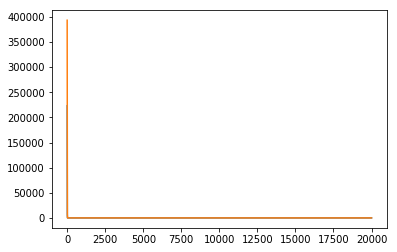

In [18]:
plt.plot(df)
plt.show()